In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('/home/phuongthao/Weather DataPY.csv')
df.head()

,Datetime,NhietDo,DiemSuong,DoAm,TocDoGio_km/h,TamNhin_km,ApSuat,ThoiTiet
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
# Convert time stamp column to time format
df.index = pd.to_datetime(df['Datetime']).dt.floor('T')
df = df.iloc[:, 1:]

In [4]:
# Xoa truong du lieu rong
df.drop(df[df.isnull().any(axis = 1)].index, inplace = True)


# Separate 'Weather' column into three separate parts (each description of weather conditions in a separate column)
weather_split = ['ThoiTiet - p. 1', 'ThoiTiet - p. 2', 'ThoiTiet - p. 3']
df[weather_split] = df['ThoiTiet'].str.split(',', expand = True)


# Storage of data on weather conditions according to zero-one coding.
weather_category_list = np.array([])

for column in df[weather_split]:
    weather_category_list = np.append(weather_category_list, df[weather_split][column].unique())

weather_category_list = weather_category_list[weather_category_list != None]
weather_category_list = np.unique(weather_category_list)

df[weather_category_list] = 0

for column in df[weather_split]:
    for index in df[weather_split].index:
        if df.loc[index, column] != None:
            df.at[index, df.loc[index, column]] = df.loc[index, df.loc[index, column]] + 1

# Delete 'Weather - p. 1', 'Weather - p. 2' and 'Weather - p. 3' columns (redundant)
df.drop(weather_split, axis = 1, inplace = True)

#Tạo một tập hợp tên cột phụ trợ trong các giá trị đo được
weather_measurement_data = ['NhietDo', 'DiemSuong', 'DoAm', 'TocDoGio_km/h', 'TamNhin_km', 'ApSuat']

In [5]:
df.head(10)

,NhietDo,DiemSuong,DoAm,TocDoGio_km/h,TamNhin_km,ApSuat,ThoiTiet,Blowing Snow,Clear,Cloudy,...,Moderate Rain Showers,Moderate Snow,Mostly Cloudy,Rain,Rain Showers,Snow,Snow Grains,Snow Pellets,Snow Showers,Thunderstorms
Datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NhietDo                8784 non-null   float64
 1   DiemSuong              8784 non-null   float64
 2   DoAm                   8784 non-null   int64  
 3   TocDoGio_km/h          8784 non-null   int64  
 4   TamNhin_km             8784 non-null   float64
 5   ApSuat                 8784 non-null   float64
 6   ThoiTiet               8784 non-null   object 
 7   Blowing Snow           8784 non-null   int64  
 8   Clear                  8784 non-null   int64  
 9   Cloudy                 8784 non-null   int64  
 10  Drizzle                8784 non-null   int64  
 11  Fog                    8784 non-null   int64  
 12  Freezing Drizzle       8784 non-null   int64  
 13  Freezing Fog           8784 non-null   int64  
 14  Freezing Rain       

In [7]:
#Hiển thị tóm tắt thống kê cho các cột đã chọn
summary = df[weather_measurement_data].describe().drop("count")
summary.head()

,NhietDo,DiemSuong,DoAm,TocDoGio_km/h,TamNhin_km,ApSuat
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000


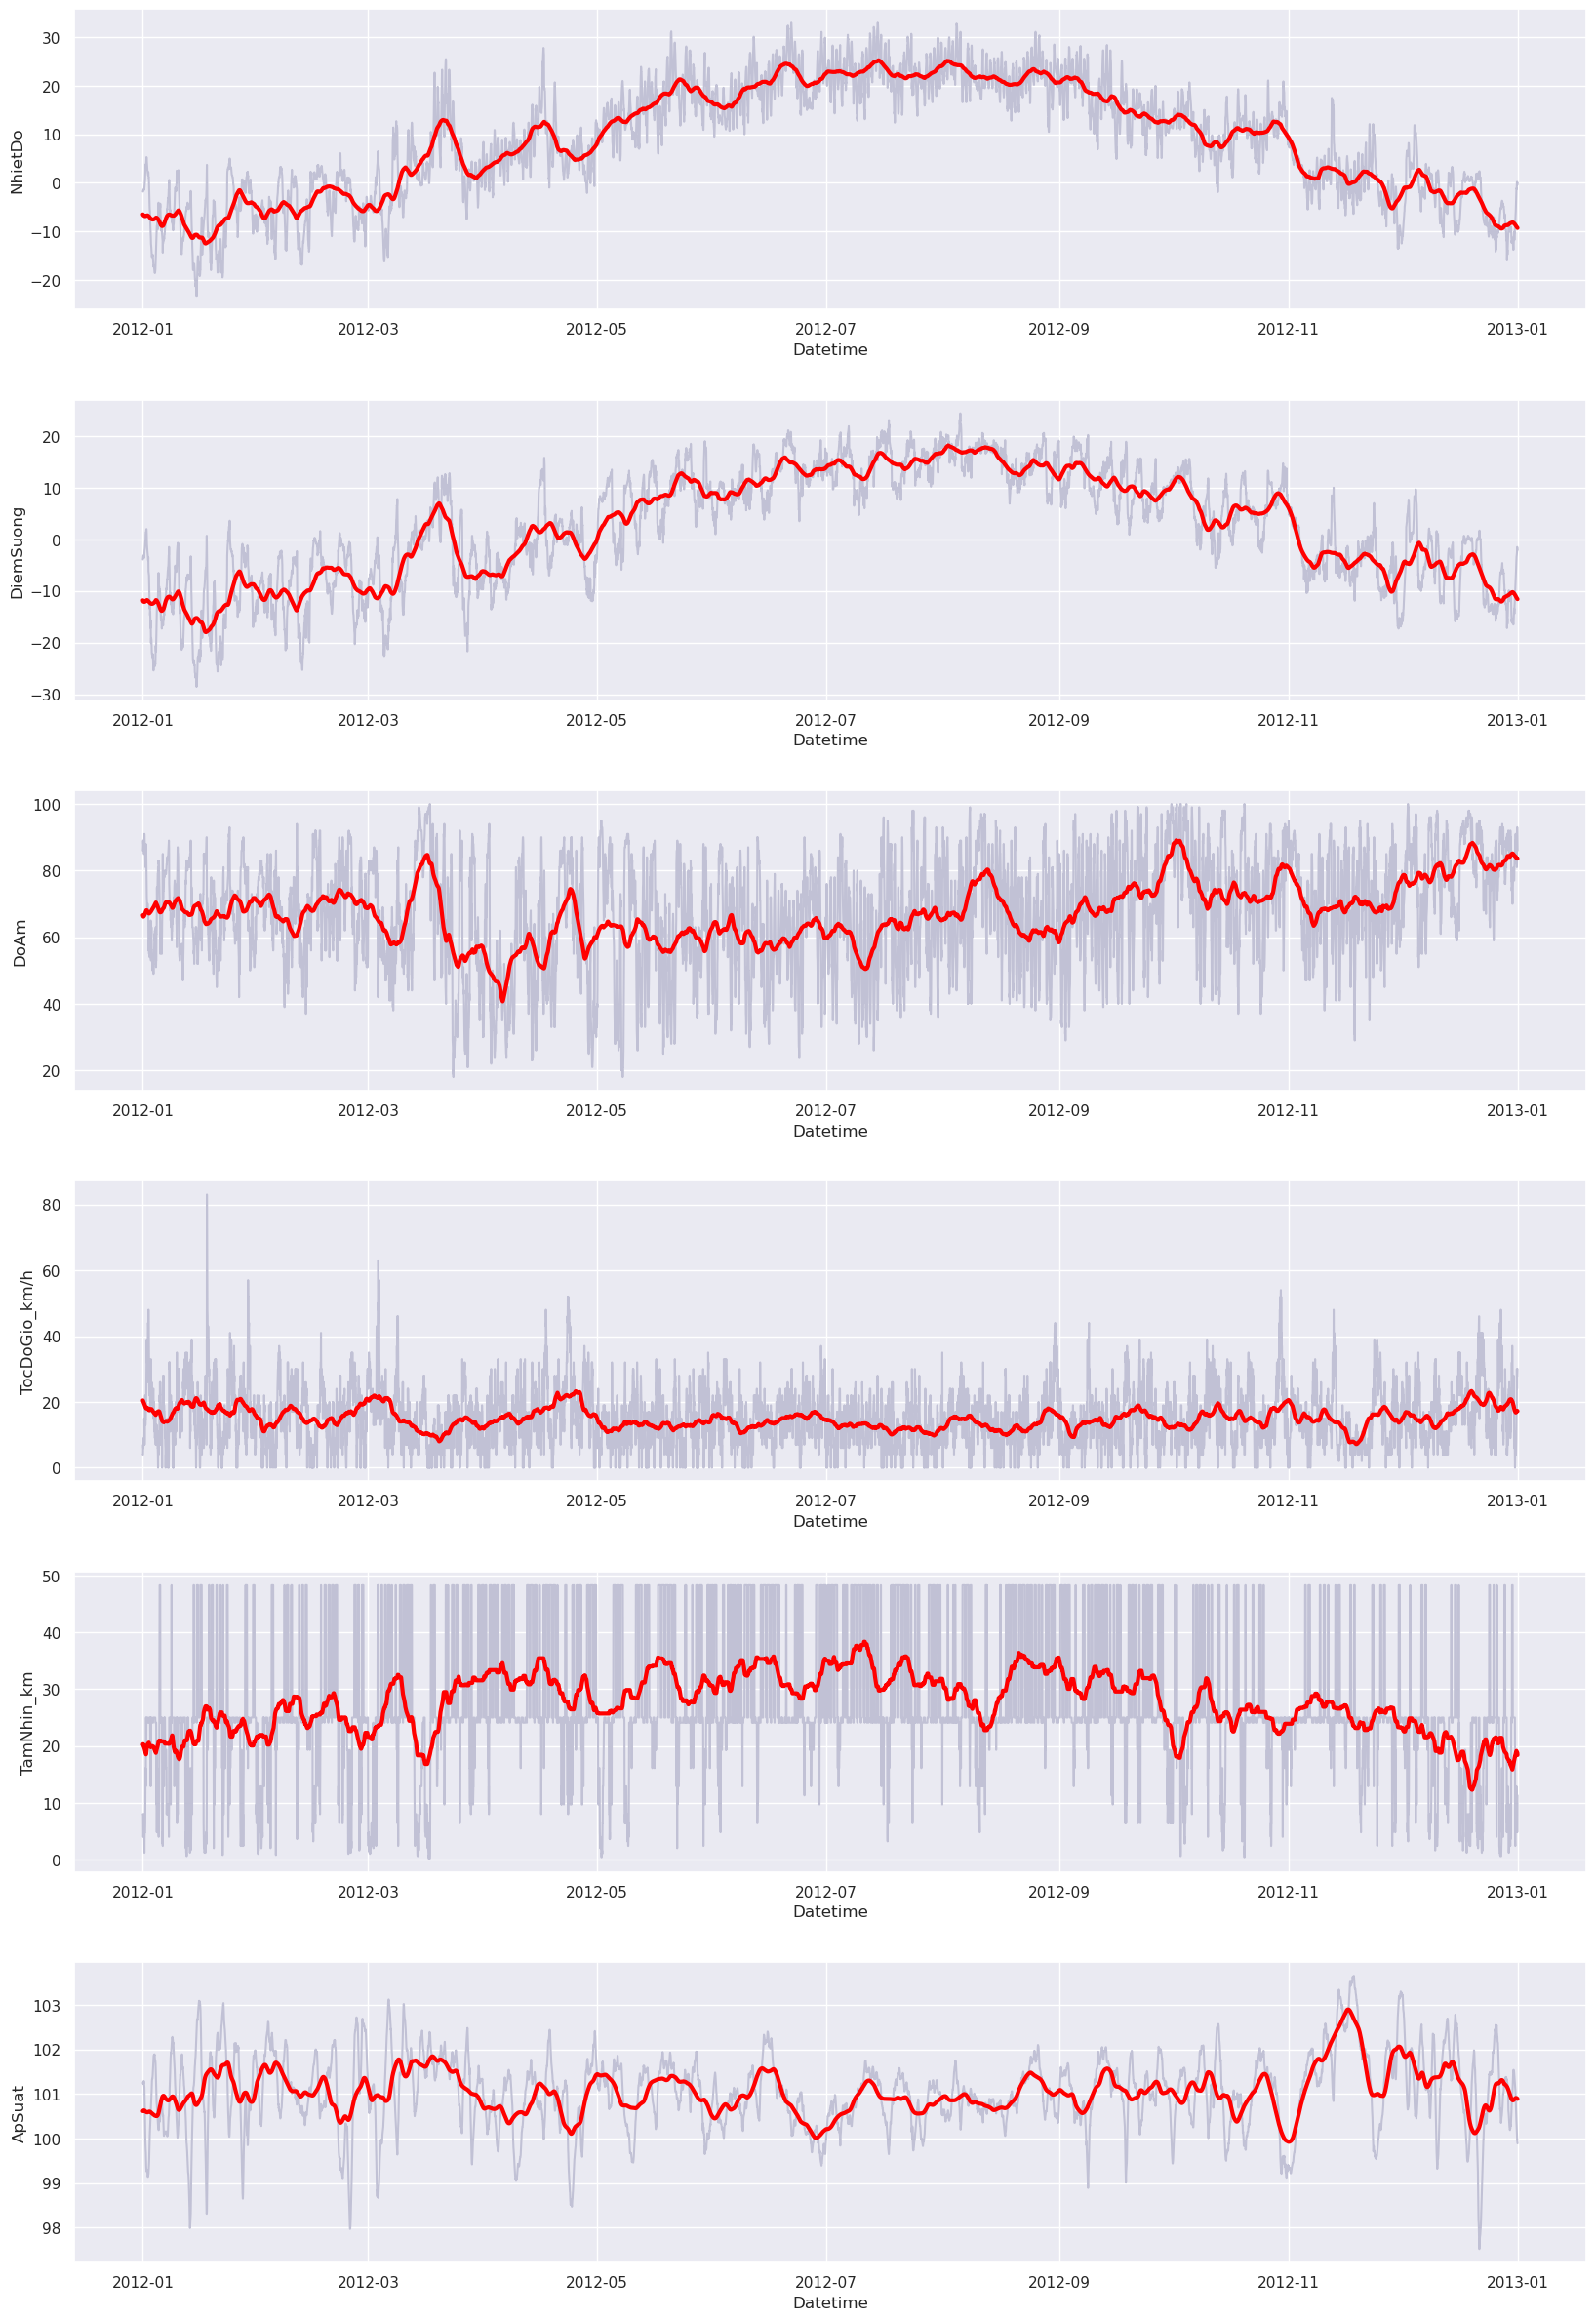

In [8]:
#Hiển thị tóm tắt thống kê cho các cột đã chọn
df[weather_measurement_data].describe()


#Mau
color_1 = '#BFAF9D'
color_2 = '#C1C1D5'
color_3 = '#FF0000'
color_4 = sns.diverging_palette(h_neg = 32, h_pos = 32, s = 21, l = 68, as_cmap = True)


#Tính toán đường trung bình động của các tham số đo riêng lẻ
for column in df[weather_measurement_data]:
    df['SMA168 ' + column] = df[column].rolling('168h', center = True).mean()


# Display line graphs
plt.figure(figsize = (20, 30))

plt.subplot(611)
sns.lineplot(data = df, x = 'Datetime', y = 'NhietDo', color = color_2)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 NhietDo', color = color_3, lw = 3)

plt.subplot(612)
sns.lineplot(data = df, x = 'Datetime', y = 'DiemSuong', color = color_2)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 DiemSuong', color = color_3, lw = 3)

plt.subplot(613)
sns.lineplot(data = df, x = 'Datetime', y = 'DoAm', color = color_2)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 DoAm', color = color_3, lw = 3)

plt.subplot(614)
sns.lineplot(data = df, x = 'Datetime', y = 'TocDoGio_km/h', color = color_2)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 TocDoGio_km/h', color = color_3, lw = 3)

plt.subplot(615)
sns.lineplot(data = df, x = 'Datetime', y = 'TamNhin_km', color = color_2)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 TamNhin_km', color = color_3, lw = 3)

plt.subplot(616)
sns.lineplot(data = df, x = 'Datetime', y = 'ApSuat', color = color_2)
sns.lineplot(data = df, x = 'Datetime', y = 'SMA168 ApSuat', color = color_3, lw = 3)

plt.subplots_adjust(hspace = 0.3)
plt.show()

In [9]:
#MLPRegressor TamNhin_km

In [10]:
df['Datetime (month)'] = pd.to_datetime(df.index).month
df['Datetime (day)'] = pd.to_datetime(df.index).day
df['Datetime (hour)'] = pd.to_datetime(df.index).hour

param_ml_input = ['Datetime (month)', 'Datetime (day)', 'Datetime (hour)', 'NhietDo', 'DoAm', 'ApSuat', 'Fog', 'Rain', 'Snow']
param_ml_output = 'TamNhin_km'

X_data = df[param_ml_input]
y_data = df[param_ml_output]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 1/3)

scaler =  StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(max_iter = 5000).fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

result = pd.DataFrame({'Giá trị thực tế (y_test)': y_test,
                       'Giá trị được mô hình dự đoán (y_pred)': y_pred,
                       'Sự khác biệt': abs(y_pred - y_test)})
result.head(10)

,Giá trị thực tế (y_test),Giá trị được mô hình dự đoán (y_pred),Sự khác biệt
Datetime,,,
2012-08-27 01:00:00,25.0,21.756386,3.243614
2012-11-10 05:00:00,25.0,28.351969,3.351969
2012-02-21 11:00:00,48.3,37.028954,11.271046
2012-10-24 15:00:00,48.3,44.709849,3.590151
2012-06-30 20:00:00,25.0,23.678558,1.321442
2012-04-03 01:00:00,25.0,22.512626,2.487374
2012-08-01 13:00:00,24.1,30.197837,6.097837
2012-05-19 04:00:00,48.3,31.198411,17.101589
2012-01-22 01:00:00,25.0,20.120118,4.879882


In [11]:
result.describe()[result.describe().index != 'count']

,Giá trị thực tế (y_test),Giá trị được mô hình dự đoán (y_pred),Sự khác biệt
mean,27.501161,27.295835,5.153165
std,12.638902,10.263125,5.046340
min,0.200000,1.699209,0.000142
25%,24.100000,22.366786,1.417968
50%,25.000000,25.832018,3.349004
75%,25.000000,33.205833,7.317037
max,48.300000,51.937318,27.930467


In [12]:
#RANDOM FORESTS TamNhin_km

In [13]:
rfr = RandomForestRegressor().fit(X_train_scaled, y_train)
y_pred = rfr.predict(X_test_scaled)
result = pd.DataFrame({'Giá trị thực tế (y_test)': y_test,
                       'Giá trị được mô hình dự đoán (y_pred)': y_pred,
                       'Sự khác biệt': abs(y_pred - y_test)})
result.head()

,Giá trị thực tế (y_test),Giá trị được mô hình dự đoán (y_pred),Sự khác biệt
Datetime,,,
2012-08-27 01:00:00,25.0,24.982,0.018
2012-11-10 05:00:00,25.0,25.848,0.848
2012-02-21 11:00:00,48.3,33.786,14.514
2012-10-24 15:00:00,48.3,43.971,4.329
2012-06-30 20:00:00,25.0,25.050,0.050


In [14]:
result.describe()[result.describe().index != 'count']

,Giá trị thực tế (y_test),Giá trị được mô hình dự đoán (y_pred),Sự khác biệt
mean,27.501161,27.607302,3.964957
std,12.638902,10.611151,5.173068
min,0.200000,0.856000,0.000000
25%,24.100000,24.224750,0.242000
50%,25.000000,25.215000,1.651500
75%,25.000000,33.404750,5.722500
max,48.300000,48.300000,28.125000


In [15]:
#MLPRegressor NhietDo

In [16]:
df['Datetime (month)'] = pd.to_datetime(df.index).month
df['Datetime (day)'] = pd.to_datetime(df.index).day
df['Datetime (hour)'] = pd.to_datetime(df.index).hour

param_ml_input = ['Datetime (month)', 'Datetime (day)', 'Datetime (hour)', 'NhietDo', 'DoAm', 'ApSuat', 'Fog', 'Rain', 'Snow']
param_ml_output = 'NhietDo'

X_data = df[param_ml_input]
y_data = df[param_ml_output]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 1/3)

scaler =  StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(max_iter = 5000).fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

result = pd.DataFrame({'Giá trị thực tế (y_test)': y_test,
                       'Giá trị được mô hình dự đoán (y_pred)': y_pred,
                       'Sự khác biệt': abs(y_pred - y_test)})
result.head(10)

,Giá trị thực tế (y_test),Giá trị được mô hình dự đoán (y_pred),Sự khác biệt
Datetime,,,
2012-04-13 21:00:00,11.7,11.703124,0.003124
2012-12-31 00:00:00,-11.1,-10.840628,0.259372
2012-06-13 11:00:00,19.5,19.646872,0.146872
2012-12-13 12:00:00,-0.4,-0.425551,0.025551
2012-07-16 00:00:00,21.2,21.220665,0.020665
2012-04-25 12:00:00,8.0,7.945547,0.054453
2012-05-09 00:00:00,12.5,12.523526,0.023526
2012-04-12 05:00:00,3.8,3.926329,0.126329
2012-01-22 11:00:00,-13.0,-13.687034,0.687034


In [17]:
result.describe()[result.describe().index != 'count']

,Giá trị thực tế (y_test),Giá trị được mô hình dự đoán (y_pred),Sự khác biệt
mean,8.945458,8.944358,0.062494
std,11.661458,11.653789,0.063754
min,-22.800000,-22.618391,0.000006
25%,0.200000,0.243041,0.021392
50%,9.750000,9.735382,0.046073
75%,18.900000,18.936574,0.083421
max,33.000000,32.992832,1.079275


In [18]:
#RANDOM FORESTS NhietDo

In [19]:
rfr = RandomForestRegressor().fit(X_train_scaled, y_train)
y_pred = rfr.predict(X_test_scaled)

result = pd.DataFrame({'Giá trị thực tế (y_test)': y_test,
                       'Giá trị được mô hình dự đoán (y_pred)': y_pred,
                       'Sự khác biệt': abs(y_pred - y_test)})
result.head()

,Giá trị thực tế (y_test),Giá trị được mô hình dự đoán (y_pred),Sự khác biệt
Datetime,,,
2012-04-13 21:00:00,11.7,11.700,2.131628e-14
2012-12-31 00:00:00,-11.1,-11.100,7.105427e-15
2012-06-13 11:00:00,19.5,19.500,0.000000e+00
2012-12-13 12:00:00,-0.4,-0.399,1.000000e-03
2012-07-16 00:00:00,21.2,21.200,2.486900e-14


In [20]:
result.describe()[result.describe().index != 'count']

,Giá trị thực tế (y_test),Giá trị được mô hình dự đoán (y_pred),Sự khác biệt
mean,8.945458,8.944913,2.160178e-03
std,11.661458,11.661511,1.427187e-02
min,-22.800000,-23.076000,0.000000e+00
25%,0.200000,0.201000,1.776357e-15
50%,9.750000,9.749500,1.421085e-14
75%,18.900000,18.900000,4.263256e-14
max,33.000000,32.724000,3.260000e-01
